(statistics-hs:random-variables:pdf-transform)=
# Trasformazione di probabilità di densità


## Variabile singola

### Cambio di variabile

#### Traslazione
Data la variabile casuale $X$ con distribuzione di probabilità $f_X(x)$ nota, la variabile casuale

$$Y = X + a$$

ha funzione di probabilità

$$f_Y(x+a) = f_X(x) \ .$$

Tra la media e la varianza delle due variabili casuali valgono le relazioni

$$\mu_Y = \mu_X + a \qquad , \qquad \sigma^2_Y = \sigma^2_X \ .$$

La dimostrazione è lasciata come esercizio.

```{dropdown} Dimostrazione.
La probabilità che la variabile $Y = X + a$ abbia valore $y = x + a \in [ y_0, y_0 + dy ]$, è uguale alla probabilità che l'evento $X$ abbia valore $x \in [x_0, x_0 + dx]$, con $x_0 = y_0 - a$ e $dy = dx$,

$$\begin{aligned}
  P(Y \in [y_0, y_0 + dy]) & = P(X + a \in [y_0, y_0 + dy]) = \\
  & = P(X \in [y_0 - a, y_0 - a + dy]) = \\
  & = P(X \in [x_0, x_0 + dx])
\end{aligned}$$

Per la definizione di densità di probabilità,

$$\begin{aligned}
  P(Y \in [y_0, y_0 + dy]) & = \int_{y=y_0}^{y_0 + dy} f_Y(y) \, dy =  & y_0 = x_0 + a \\
  & = \int_{y=x_0+a}^{x_0 + a + dx} f_Y(y) \, dy = & x = y - a, \ dy = dx \\
  & = \int_{x=x_0}^{x_0+dx} f_Y(x-a) \, dx \\
  P(X \in [x_0, x_0 + dx]) & = \int_{x=x_0}^{x_0+dx} f_X(x) \, dx
\end{aligned}$$

dal confronto tra i due termini, e dall'arbitrarietà di $x_0$ e $dx$, si ottiene $f_{X}(x) = f_Y(x-a)$.

```

#### Scalatura
Data la variabile casuale $X$ con distribuzione di probabilità $f_X(x)$ nota, la variabile casuale

$$Y = \frac{X}{a}$$

ha funzione di probabilità

$$f_Y\left( \frac{x}{a} \right) = a f_X(x)$$

Tra la media e la varianza delle due variabili casuali valgono le relazioni

$$\mu_Y = \frac{\mu_X}{a} \qquad , \qquad \sigma^2_Y = \frac{\sigma^2_X}{a^2} \ .$$

La dimostrazione è lasciata come esercizio.

```{dropdown} Dimostrazione.
La probabilità che la variabile $Y = \frac{X}{a}$ abbia valore $y = \frac{x}{a} \in [ y_0, y_0 + dy ]$, è uguale alla probabilità che l'evento $X$ abbia valore $x \in [x_0, x_0 + dx]$, con $x_0 = a y_0$ e $dy = a dx$,

$$\begin{aligned}
  P(Y \in [y_0, y_0 + dy]) & = P\left( \frac{X}{a} \in [y_0, y_0 + dy]\right) = \\
  & = P(X \in [a y_0, a y_0 + a dy]) = \\
  & = P(X \in [x_0, x_0 + dx])
\end{aligned}$$

Per la definizione di densità di probabilità,

$$\begin{aligned}
  P(Y \in [y_0, y_0 + dy]) & = \int_{y=y_0}^{y_0 + dy} f_Y(y) \, dy =  & y_0 = \frac{x_0}{a} \\
  & = \int_{y=a \, x_0}^{a x_0 + a dx} f_Y(y) \, dy = & y = \frac{x}{a}, \ dy = \frac{dx}{a} \\
  & = \frac{1}{a} \int_{x=x_0}^{x_0+dx} f_Y\left( \frac{x}{a} \right) \, dx \\
  P(X \in [x_0, x_0 + dx]) & = \int_{x=x_0}^{x_0+dx} f_X(x) \, dx
\end{aligned}$$

dal confronto tra i due termini, e dall'arbitrarietà di $x_0$ e $dx$, si ottiene $f_{X}(x) = \frac{1}{a} f_Y\left(\frac{x}{a}\right)$.

```

#### Trasformazione affine

Combinando la traslazione e la scalatura, si ottiene la più generale trasformazione affine

$$X = \frac{Y - y_0}{a} \ ,$$

usata spesso come **scalatura** delle variabili nel *preprocessing*. **todo** *riferimento a scalatura di variabili su valori significativi del problema, per bilanciare il problema e lavorare con variabili non-dimensionali significatie con lo stesso ordine di grandezza* **(!!!)**

Tra la media e la varianza delle due variabili casuali valgono le relazioni

$$\mu_X = \frac{\mu_Y - y_0}{a} \qquad , \qquad \sigma^2_X = \frac{\sigma^2_Y}{a^2} \ .$$

La dimostrazione è lasciata come esercizio.


Le tre trasformazione discusse vengono applicate alla [variabile normale](statistics-hs:random-variables:continuous:examples:norm) $X \sim N(x; \mu=0, \sigma^2=1)$. In particolare si mostrano gli effetti delle trasformazioni: 1. $X = Y + 1$; 2. $X = 2 Y$; 3. $X = 2 (Y - 1)$

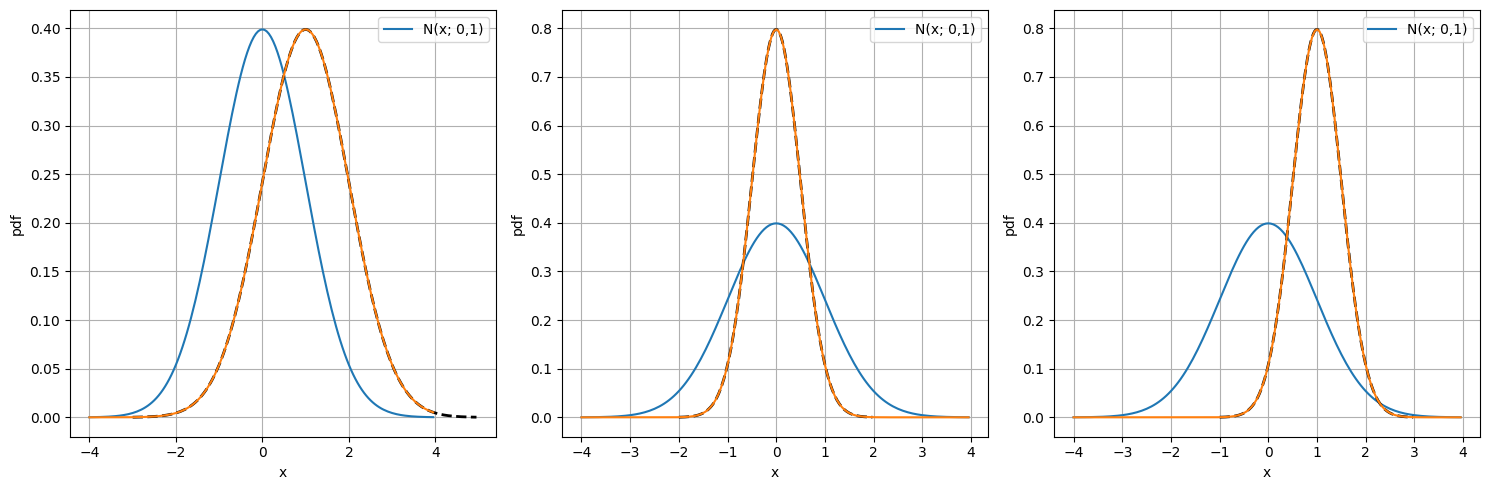

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the distributions
mu, sigma = 0., 1.                # Property of Gaussian
a_transl, a_scale  = 1., 2.

transl_v = np.array([ a_transl, 0., a_transl ])
scale_v  = np.array([ 1., a_scale, a_scale ])
mu_v = mu + transl_v
sigma_v = sigma / scale_v

# Create x values for the distributions
x0_plot = np.arange(-4.,4., .05)
p0_norm = norm.pdf(x0_plot, loc=mu, scale=sigma)

xv_plot, pv_norm = [], []
for i in range(len(transl_v)):
    xv_plot += [ x0_plot / scale_v[i] + transl_v[i] ]
    pv_norm += [ norm.pdf(x0_plot, loc=mu_v[i], scale=sigma_v[i]) ]
    
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot
for i in range(len(transl_v)):
    axes[i].plot(x0_plot, p0_norm, label="N(x; 0,1)") #
    axes[i].plot(xv_plot[i], p0_norm*scale_v[i], '--', color='black', lw=2)
    axes[i].plot(x0_plot, pv_norm[i])
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("pdf")
    axes[i].grid()
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Multi-variabile

### Cambio di variabili

### Combinazione di variabili

#### Somma

Date due variabili casuali $X$, $Y$, con probabilità congiunta $p_{XY}(x,y)$, la loro somma $Z = X + Y$ è una variabile casuale dipendente con distribuzione di probabilità

$$p(z) = \int_y p_{XY}(z-y,y) \, dy = \int_{x} p_{XY}(x, z-x) \, dx \ .$$

Se le due variabili sono tra di loro *statisticamente indipendenti*, la densità di probabilità congiunta è uguale al prodotto delle densità di probabilità delle singole variabili, $p_{XY}(x,y) = p_X(x) p_Y(y)$, e quindi la densità di probabilità della somma è uguale alla **convoluzione** tra le densità di probabilità delle due variabili,

$$p(z) = \int_y p_{X}(z-y) \, p_{Y}(y) \, dy \ .$$


```{dropdown} Valore atteso
Il **valore atteso** della somma è quindi 

$$E[Z] = \int_z z \, p(z) \, dz = \int_{y,z} z \, p_{XY}(z-y,y) \, dy \, dz =  \int_{x,y} (x+y) \, p_{XY}(x,y) \, dx \, dy \ , $$

e, nel caso in cui le due variabili siano tra di loro *statisticamente indipendenti*, 

$$\begin{aligned}
  E[Z]
  & = \int_{x,y} (x + y) \, p_X(x) \, p_Y(y) \, dx \, dy = \\
  & = \int_{x,y} x \, p_X(x) \, p_Y(y) \, dx \, dy + \int_{x,y} y \, p_X(x) \, p_Y(y) \, dx \, dy = \\
  & = \int_x x \, p_X(x) \, dx + \int_y y \, p_Y(y) \, dy = E[X] + E[Y] \ .
\end{aligned}$$
```

```{dropdown} Varianza
La **varianza** della somma è 

$$\begin{aligned}
  \sigma_Z^2 = E\left[(Z - E[Z])^2\right] 
  = E\left[Z^2\right] - E[Z]^2
  = \int_z z^2 p(z) \, dz - E[Z]^2
\end{aligned}$$

e nel caso le due variabili siano tra di loro *statisticamente indipendenti*,

$$\begin{aligned}
  \sigma_Z^2 
  & = \int_z z^2 p(z) \, dz - E[Z]^2 = \\
  & = \int_{x,y} (x+y)^2 \, p_{X}(x) \, p_{Y}(y) \, dx \, dy - \left(E[X] + E[Y]\right)^2 = \\
  & = \int_{x} x^2 \, p{X}(x) \, dx + \int_{y} y^2 \, p_Y(y) \, dy + 2 E[X] E[Y] - \left( E[X]^2 + 2 E[X] E[Y] + E[Y]^2 \right) = \\
  & = \int_{x} x^2 \, p{X}(x) \, dx - E[X]^2 + \int_{y} y^2 \, p_Y(y) \, dy - E[Y]^2 = \\
  & = \sigma_X^2 + \sigma_Y^2 \ .
\end{aligned}$$
```

#### Prodotto

Date due variabili casuali $X$, $Y$ con probabilità congiunta $p_{XY}(x,y)$, il loro prodotto $Z = X \cdot Y$ è una variabile casuale dipendente con distribuzione di probabilità

$$p(z) = \int_{y} p_{XY} \left(\frac{z}{y}, y \right) \, dy = \int_{x} p_{XY} \left(x, \frac{z}{x} \right) \, dx$$

Se le due variabili sono *statisticamente indipendenti* 

$$p(z) = \int_x p_X(x) \, p_Y\left( \frac{z}{x} \right) \, dx$$

(**todo** *ha qualche uso questa formula? Si ritrova la convoluzione con il cambio di variabili $z=e^v$, $x=e^u$*)
<!--
$$p(e^v) = \int_u p_X(e^u) \, p_Y\left( e^{v-u} \right) e^u \, du$$
-->

```{dropdown} Valore atteso
Il **valore atteso** del prodotto è

$$E[Z] = \int_z z \, p(z) \, dz = \int_{y,z} z \, p_{XY}\left(\frac{z}{y},y\right) \, dy \, dz =  \int_{x,y} x y \, p_{XY}(x,y) \, dx \, dy \ , $$

e, nel caso in cui le due variabili siano tra di loro *statisticamente indipendenti*,

$$\begin{aligned}
  E[Z]
  & = \int_{x,y} x y \, p_X(x) \, p_Y(y) \, dx \, dy = \\
  & = \int_{x} x \, p_X(x) \, dx \cdot \int_y y \, p_Y(y) \, dy = E[X] \cdot E[Y] \ .
\end{aligned}$$
```

```{dropdown} Varianza
La **varianza** del prodotto è

$$\begin{aligned}
  \sigma_Z^2 = ...
\end{aligned}$$

e nel caso le due variabili siano tra di loro *statisticamente indipendenti*,

$$\begin{aligned}
  \sigma_Z^2 
  & = \int_{x,y} x^2 y^2 p_X(x) \, p_Y(y) \, dx \, dy - \left( E[X] \, E[Y] \right)^2 = \\
  & = R_X^2 \, R_Y^2 - E[X]^2 \, E[Y]^2 = \\
  & = \left( \sigma_X^2 + E[X]^2 \right)\left( \sigma_Y^2 + E[Y]^2 \right) - E[X]^2 \, E[Y]^2 = \\
  & = \sigma_X^2 \, \sigma_Y^2 + \sigma_X^2 \, E[Y]^2 + \sigma_Y^2 \, E[X]^2
\end{aligned}$$

In termini di correlazione, $R_X^2 = \sigma_X^2 + E[X]^2$,

$$R_Z^2 = R_X^2 \, R_Y^2 \ .$$
```